In [3]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time 

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [1]:
# print(bdata.keys())
# print(bdata.feature_names) # column names
# print(bdata.data.shape) # the data of the features
# print(bdata.target.shape) # target price of the houses with feature data 
# # uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

---

## Part 1: Descriptive analysis


### Converting the Boston Housing Dataset into a DataFrame 

Converted data to a dataframe for plotting, EDA, and manipulation. 

In [4]:
bdata_df = pd.DataFrame(bdata.data) # convert bdata.data (the 'data' key in bdata) to a dataframe
bdata_df.columns = bdata.feature_names # putting the feature names as the column headers
bdata_df['MEDV'] = bdata.target # create a column for the target price of houses with the data 
bdata_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [5]:
bdata_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.1: Histogram of housing prices

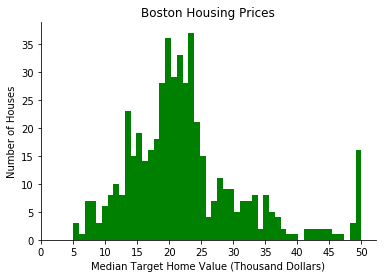

In [51]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
fig, ax = plt.subplots()
plt.hist(bdata_df['MEDV'], bins = 50, color='g')
plt.xticks(np.arange(0,55,5))
plt.xlabel('Median Target Home Value (Thousand Dollars)')
plt.ylabel('Number of Houses')
plt.title('Boston Housing Prices')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### 1.2: Scatter plot of housing prices and crime

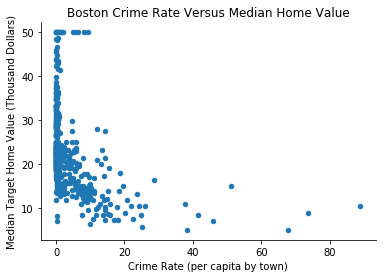

In [7]:
# enter your code below
fig, ax = plt.subplots()
plt.scatter(x=bdata_df['CRIM'], y=bdata_df['MEDV'], s=20)
plt.xlabel('Crime Rate (per capita by town)')
plt.ylabel('Median Target Home Value (Thousand Dollars)')
plt.title('Boston Crime Rate Versus Median Home Value')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### 1.3 Create your own (creative and effective) visualization

In [8]:
# subsetting target home prices based on whether they're bounded by the charles river 
river_price = bdata_df['MEDV'].loc[bdata_df['CHAS'] == 1]
no_river_price = bdata_df['MEDV'].loc[bdata_df['CHAS'] == 0]

sub_data = [river_price, no_river_price]

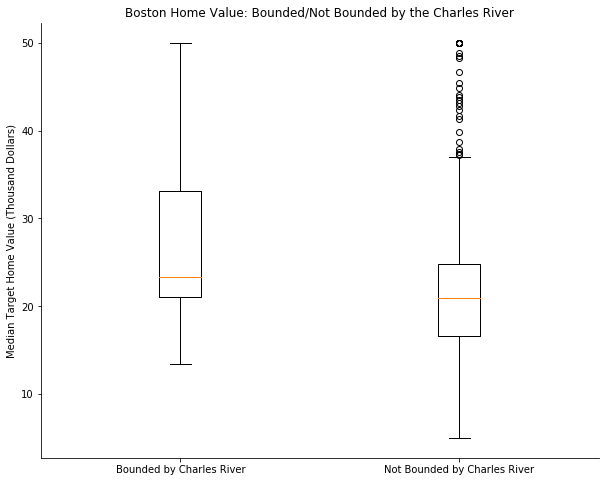

In [9]:
# enter your code here

fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot(sub_data)
ax.set_xticklabels(['Bounded by Charles River', 'Not Bounded by Charles River'])
plt.ylabel('Median Target Home Value (Thousand Dollars)')
plt.title('Boston Home Value: Bounded/Not Bounded by the Charles River')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

---

## Part 2: Experimental Setup



### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers




In [10]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((2,2,3),(0,2,6))
2.0816659994661326
"""
def compute_rmse(predictions, yvalues):
    # importing numpy 
    import numpy as np
    
    diff = np.subtract(predictions,yvalues)
    rmse = np.sqrt(np.mean(diff**2))
    
    return rmse
    

In [11]:
# Example RMSE 
predictions = (2,2,3)
yvalues=(0,2,6)
print(compute_rmse(predictions, yvalues))

2.0816659994661326


### 2.2 Divide your data into training and testing datasets




In [4]:
np.random.seed(seed=13579)

"""
Function
--------
split_data

Will split a given dataframe into a training and test dataset. Function is expecting a dataframe as the data. 

Parameters
----------
data : dataframe
    Dataframe which is being split into training and test dataset.

test_size : float
    Proportion of the dataset which should be set aside to become the test dataset
    
seed : int
    Used for setting a seed (for reproducible results when randomizing)

Returns
-------
test_data : dataframe
    Dataframe of the test data

train_data : dataframe
    Dataframe of the training data 

"""

def split_data(data, test_size, seed=13579):
    
    if test_size >= 1 or test_size <= 0:
        print('Please provide an appropriate test size (float between 0 and 1).')
        return
    
    np.random.seed(seed)
    data = data.copy() # create copy as to not alter the original dataset
    np.random.shuffle(data.values) # shuffle the dataset
    
    test_rows = int(len(data)*test_size)
    train_rows = int(len(data) - test_rows)
    
    test_data = data[:test_rows]
    train_data = data[test_rows:]
    
    return test_data, train_data
    
    

In [13]:
bdata_test, bdata_train = split_data(bdata_df, test_size=.34)

In [14]:
print(len(bdata_df)) # original dataset
print(len(bdata_train)) # training dataset which is 66% of original data
print(len(bdata_test)) # testing dataset which is 34% of original data 

506
334
172


### 2.3 Use a very bad baseline for prediction, and compute RMSE


In [15]:
# enter your code here
from copy import deepcopy 

train_target_price_mean = np.mean(bdata_df['MEDV']) # calculating the mean of the target price column
#print(train_target_price_mean)

# creating new column with mean of TARGET HOUSE PRICE for the training dataset
bdata_train = deepcopy(bdata_train) # use deepcopy to avoid errors when setting value of new column
bdata_train['MEANV'] = train_target_price_mean

# creating a new column with mean of TARGET HOSUE PRICE for the testing dataset
bdata_test = deepcopy(bdata_test)
bdata_test['MEANV'] = train_target_price_mean

train_rmse = compute_rmse(bdata_train['MEANV'], bdata_train['MEDV'])
test_rmse = compute_rmse(bdata_test['MEANV'], bdata_test['MEDV'])

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


Training RMSE: 9.432586352934967
Testing RMSE: 8.693449994558764


#### *Observations:*

The Training RMSE is higher than the Testing RMSE. This means that the model hasn't overfit the data. However, the RMSE for the training set was 9.43, showing how much our estimates (in this case the MEAN of the houses target price) deviated from the actual houses' target prices. House target prices ranged from 5 to 50 (in thousand dollars), meaning a RMSE of 9.43 is quite high (a high difference between predicted values, the MEAN house target price, and that of the actual value). Furthermore, as the mean was used as the model, the RMSE and the standard deviation are relatively the same. 

On the other hand, the RMSE for the testing set is slightly lower than the training RMSE. This may be because the testing set contained less data than the training dataset. Furthermore, it may also be because the test dataset had more target home prices that were closer to the mean. 

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function


In [16]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((3,4),(6,8),2))
5.0

"""
def distance(x1, x2, L):
    
    import numpy as np # for calculating functions 
    # convert arrays into an array (if they weren't already)
    x1 = np.array(x1) 
    x2 = np.array(x2)

    diff = np.abs(x1-x2) # get the absolute difference between arrays 
    diff_pow = np.power(diff, float(L)) # resulting difference array is raised to the L 
    diff_sum = np.sum(diff_pow) # sum the resulting array
    dist = np.power(diff_sum, float(1/L)) # raise the array to the 1/L
    
    return dist

In [17]:
# x1 = (3,4)
# x2 = (6,8)
# L = 1
print("L2:", distance((3,4),(6,8),2))
print("L1:", distance((3,4),(6,8),1))

L2: 5.0
L1: 7.0


### 3.2 Basic Nearest Neighbor algorithm


In [18]:
"""
Function
--------
nneighbor

    Calculate basic nearest neighbors using input features and an output feature.
    This function is tailored for the Boston Housing dataset. Function expects inputs to be a dataframe.

Parameters
----------
train_df, test_df : dataframe
    Dataframes of the training dataset and test dataset.

input_feat, output_feat: list
    Expecting a list of feature names for input and the output feature. 
    
L: int
    Value of L to use in computing distances 

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction
    
time_taken 
    The time it took to complete calculations
    
Example
-------
>>> nneighbor(train_df=bdata_train, test_df=bdata_test, input_feat=['CRIM', 'RM'], output_feat=['MEDV'], L=2)
Time taken: 2.71 seconds
6.681010099809551
"""

import time # used for timing the function
def nneighbor(train_df, test_df, input_feat, output_feat, L):
    
    start_time = time.time()
    
    # subsetting the test and train dataframes into the input and output features
    x_train = train_df[input_feat] # training dataset with input features
    y_train = train_df[output_feat] # training dataset with output feature(s)
    x_test = test_df[input_feat] # test dataset with input features
    y_test = test_df[output_feat].values.flatten().tolist() # test data output result(s); converted to list for computing RMSE
    
    # create empty list to store the distances
    dist_list=[]

    for i, test_row in x_test.iterrows(): # iterate through the test dataset (get the # of rows needed)
        min_dist = None
        for j, train_row in x_train.iterrows(): # iterate through the entire training dataset 
            dist = distance(train_row, test_row, L) # find the distance between the training j'th row with the testing i'th row
            
            if min_dist == None: # set the first calculated distance as the baseline
                min_dist = dist
                pred_value = y_train.loc[j].item()
            elif dist < min_dist: # for subsequence calculated distances, check if lower than the previous minimum distance
                min_dist = dist
                pred_value = y_train.loc[j].item()
        
        dist_pred_list = [] # empty list to store minimum distance and corresponding predicted value 
        dist_pred_list.append(min_dist)
        dist_pred_list.append(pred_value)
        dist_list.append(dist_pred_list)# append the minimum distance and the corresponding training dataset predicted values (MEDV for this assignment) 

    predicted_values = [item[1] for item in dist_list] # select the predicted values (index 1 of the list)
    
    rmse = compute_rmse(predicted_values, y_test)
    time_taken = round(time.time() - start_time,2)

    #print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds") # commenting out so 10 lines aren't reported for cross validation
    #print("RMSE:", rmse)
    return rmse, time_taken

In [19]:
# input_feat=['CRIM', 'RM'] # input features
# output_feat=['MEDV'] # output features/what is being predicted in the test dataset
# train_df = bdata_train
# test_df = bdata_test
rmse, time_taken = nneighbor(train_df=bdata_train, test_df=bdata_test, input_feat=['CRIM', 'RM'], output_feat=['MEDV'], L=2)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Time taken: 3.94
RMSE: 6.669354593787499


### 3.3 Results and Normalization



In [20]:
"""
Function
--------
normalize

    Normalizes a dataset's features. Normalizing takes an array of values for a feature and normalizes the data
    by subtracting the mean and dividing by the standard deviation.

Parameters
----------
raw_data : dataframe or array
    Data that is being normalized
    
output_feat : list of strings
    If a dataframe is input, this will indicate which column to not normalize, as in 
    the output_feat is not a feature that should be normalized.

is_df : boolean
    Indicates whether or not the raw_data input is a dataframe. 

Returns
-------
normalized_data : dataframe or array
    Returns a dataset that has been normalized
    
Example
-------
bdata_train_norm = normalize(bdata_train, is_df=True)
bdata_test_norm = normalize(bdata_test, is_df=True)

nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['CRIM', 'RM'], output_feat=['MEDV'], L=2)

"""
def normalize(raw_data, output_feat=[], is_df = False):
    
    normalized_data = raw_data.copy() # create copy of raw_data as to not alter the original data
    
    if is_df == False: # if input data is an array, normalize as such
        for i in range(0, normalized_data.shape[1]): # iterate through each list in the array
            feat_mean = np.mean(normalized_data[:,i]) # find the mean of the feature list
            feat_std = np.std(normalized_data[:,i]) # find the std deviation of the feature list
            normalized_data[:,i] = np.divide((np.subtract(normalized_data[:,i], feat_mean)), feat_std) # normalize data inline 
    else: # if the input data is a dataframe, normalize as such 
        for col in normalized_data:
            if col not in output_feat: # exclude normlization of any output features
                feat_mean = np.mean(normalized_data[col]) # find the column's mean
                feat_std = np.std(normalized_data[col]) # find the column's std
                normalized_data[col] = normalized_data[col] - feat_mean # subtract by feature mean
                normalized_data[col] = np.divide(normalized_data[col], feat_std) # divide by feature std
        
    return normalized_data


In [21]:
bdata_train_norm = normalize(bdata_train, output_feat=['MEDV'], is_df=True)
bdata_test_norm = normalize(bdata_test, output_feat=['MEDV'], is_df=True)

In [22]:
rmse, time_taken = nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['CRIM', 'RM'], output_feat=['MEDV'], L=2)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Time taken: 3.65
RMSE: 6.759360434861577


#### *Observations:*

The RMSE has increased slightly to 6.759 in comparison to the original datasets without normalization. The process of normalization helps to adjust the different scales that the features may have. Ultimately, this will help to change the data to a more common scale. For example, this is important for features like CRIM and RM as CRIM is the crime rate (ranging from <1 to 88.9) whereas RM ranges from 3.56 to 8.78 (as the average number of rooms per home/dwelling). The scale for both of these features is quite different, and normalizing looks to tackle that problem. 

### 3.4 Optimization



In [23]:
print('Features used: LSTAT, INDUS')
rmse, time_taken = nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['LSTAT', 'INDUS'], output_feat=['MEDV'], L=2)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Features used: LSTAT, INDUS
Time taken: 3.7
RMSE: 5.4133018767940815


In [24]:
print('Features used: CRIM, LSTAT | L = 2')
rmse, time_taken = nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['CRIM', 'LSTAT'], output_feat=['MEDV'], L=2)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Features used: CRIM, LSTAT | L = 2
Time taken: 3.19
RMSE: 6.289267343731719


In [25]:
print('Features used: CRIM, LSTAT | L = 5')
rmse, time_taken = nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['CRIM', 'LSTAT'], output_feat=['MEDV'], L=5)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Features used: CRIM, LSTAT | L = 5
Time taken: 2.7
RMSE: 6.184757143997859


In [26]:
print('Features used: CRIM, RM, LSTAT, PTRATIO | L = 2')
rmse, time_taken = nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['CRIM', 'RM', 'LSTAT', 'PTRATIO'], output_feat=['MEDV'], L=2)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Features used: CRIM, RM, LSTAT, PTRATIO | L = 2
Time taken: 3.1
RMSE: 3.60530132921211


In [27]:
print('Features used: CRIM, RM, LSTAT, PTRATIO | L = 5')
rmse, time_taken = nneighbor(train_df=bdata_train_norm, test_df=bdata_test_norm, input_feat=['CRIM', 'RM', 'LSTAT', 'PTRATIO'], output_feat=['MEDV'], L=5)
print('Time taken:', time_taken)
print('RMSE:', rmse)

Features used: CRIM, RM, LSTAT, PTRATIO | L = 5
Time taken: 3.04
RMSE: 3.50399273918755


#### *Observations:*

Using LSTAT (lower status of the population) and INDUS (proportion of non-retail business acres) netted a RMSE of 5.61. This is better compared to just using CRIM and RM. 

Raising the L decreases the RMSE. This decrease in the RMSE is greater when there are additional features added (compare when only using CRIM and LSTAT versus using CRIM, RM, LSTAT, and PTRATIO). However, it would seem that increasing the L increases the time to calculate the RMSE (although this varies and is somewhat inconsistent). 

Using four features (CRIM, RM, LSTAT, PTRATIO) netted a relatively low RMSE, and increasing the L to 5 decreased the RMSE even more. It is interesting to note that the RM feature was particularly impactful in lowering the RMSE (decreasing the RMSE by ~3). This may be because the number of rooms can be an indicator of the size of a house, and larger houses are typically more expensive. 

### 3.5 Cross-Validation



In [28]:
"""
Function
--------
kfold_cross_val

Conduct 10-fold cross validation and reports the RMSE for nearest neighbors (either basic or KNN). 

Parameters
----------
data : dataframe
    Dataframe which will be used

input_feat: list
    Input features being used for prediction

output_feat: list
    Output feature that is being predicted

L: int
    Value of L to use in computing distances

K: int
    Value for the number of nearest neighbors

KNN: boolean
    Indicates whether the function is being used for basic nearest neighbors or KNN

Returns
-------
rmse_avg : int
    The average RMSE of the datasets (10 folds). 
    
time_taken
    The time it took to complete calculations

"""
def kfold_cross_val(data, input_feat, output_feat, L, k_fold = 10, K=1, KNN=False):
    """Function to divide dataset into 10 equally sized samples for K-fold cross validation. 
    Function assumes that input data is a dataframe."""
    
    start_time = time.time()

    data = data.copy() # create a copy of the dataframe
    np.random.seed(seed=13579) # set seed for reproducible results
    np.random.shuffle(data.values) # shuffle the dataset
    samples = np.array_split(data, k_fold) # split the data into 10 equally sized samples
    rmse_list = [] # list to store RMSE 
    
    for i in range(len(samples)): # iterate over each sample dataset
        test_df = samples[i] # iterate through each sample set to be the test set
        train_df = samples.copy() # create copy to avoid altering original
        del train_df[i] # delete the i'th element (as it is the test set/not part of training)
        train_df = pd.concat(train_df) # combine the list of dataframes
        
        # normalize the data
        test_df = normalize(test_df, output_feat, is_df=True) 
        train_df = normalize(train_df, output_feat, is_df=True)
        
        # calculate basic nearest neighbors
        if KNN == False: # check if using basic nearest neighbor or K-nearest neighbor 
            rmse, time_taken = nneighbor(train_df, test_df, input_feat, output_feat, L)
        else:
            rmse, time_taken = knn(train_df, test_df, input_feat, output_feat, L, K)
        rmse_list.append(rmse)
    
    rmse_avg = np.mean(rmse_list)
    time_taken = round(time.time() - start_time,2)
    #print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse_avg, time_taken


In [29]:
np.random.seed(seed=13579) # assuming random seed from before
rmse_avg, time_taken = kfold_cross_val(data=bdata_df, input_feat=['CRIM', 'RM'], output_feat=['MEDV'], L=2)
print("RMSE: ", rmse_avg)
print("Time Taken:", time_taken)

RMSE:  6.627706197551741
Time Taken: 11.71


### 3.6 K-Nearest Neighbors Algorithm



In [30]:
"""
Function
--------
knn

    Calculate K-nearest neighbors using input features and an output feature.
    This function is tailored for the Boston Housing dataset. Function expects inputs to be a dataframe.
    Finds K-nearest neighbors and retrives 

Parameters
----------
train_df, test_df : dataframe
    Dataframes of the training dataset and test dataset.

input_feat, output_feat: list
    Expecting a list of feature names for input and the output feature. 
    
L: int
    Value of L to use in computing distances 
    
K: int
    Indicates the number of nearest neighbors to find 

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction. 
"""
def knn(train_df, test_df, input_feat, output_feat, L, K):
    
    start_time = time.time()
    
    # subsetting the test and train dataframes into the input and output features
    x_train = train_df[input_feat] # training dataset with input features
    y_train = train_df[output_feat] # training dataset with output feature(s)
    x_test = test_df[input_feat] # test dataset with input features
    y_test = test_df[output_feat].values.flatten().tolist() # test data output result(s); converted to list for computing RMSE
    
    dist_pred_list = []
    
    for i, test_row in x_test.iterrows(): # iterate through the test dataset (get the # of rows needed)
        temp_list = []
        for j, train_row in x_train.iterrows(): # iterate through the entire training dataset 
            dist = distance(train_row, test_row, L) # find the distance between the training j'th row with the testing i'th row
            pred_value = y_train.loc[j].item() # find corresponding predicted value
            temp_list.append((dist, pred_value)) # append all distance and predicted value
        temp_list.sort() # sort list of distance and predicted values by distance (ascending order)
        dist_pred_mean = np.mean(temp_list[0:K], axis = 0) # get the mean of distance and predicted value based on K-NN (closest distance)
        dist_pred_list.append(dist_pred_mean) # append mean values of NN (distance and predicted value) to list
        
    predicted_values = [item[1] for item in dist_pred_list] # create list of predicted values (length == y_test)
    
    rmse = compute_rmse(predicted_values, y_test)
    
    time_taken = round(time.time() - start_time,2)
    
    return rmse, time_taken

In [31]:
# 10-fold cross validation with K=3 and input features of CRIM and RM
rmse, time_taken = kfold_cross_val(data=bdata_df, input_feat=['CRIM', 'RM'], output_feat=['MEDV'], L=2, K=3, KNN=True)
print('RMSE:', rmse)
print('Time Taken:', time_taken)

RMSE: 5.897805800971891
Time Taken: 36.19


### 3.7 Using cross validation to find K



In [32]:
# setting features 
input_feat = ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
output_feat = ['MEDV']
K=25

In [33]:
# running 10 fold cross validation for values of K between 1 and 25
rmse_k25 = [] # list to store rmse (K = 1 through K = 25)
time_k25 = [] # list to store time taken for each RMSE 
start_time = time.time()

for i in range(1, K+1):
    rmse, time_taken = kfold_cross_val(data=bdata_df, input_feat=input_feat, output_feat=output_feat, L=2, K=i, KNN=True)
    rmse_k25.append(rmse)
    time_k25.append(time_taken)

print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")

Time taken: 807.19 seconds


In [34]:
k_values = np.arange(1,26) # create list 1:25
k25_df = pd.DataFrame({'k_value':k_values, 'RMSE':rmse_k25, 'Time_Taken':time_k25}) # create dataframe of results 

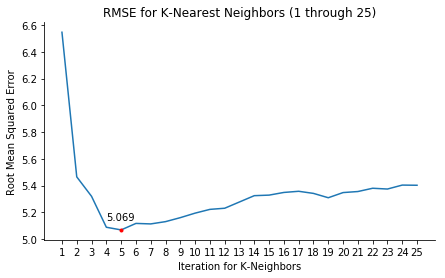

In [35]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(k25_df['k_value'], k25_df['RMSE'])
plt.plot(k25_df['k_value'][4], k25_df['RMSE'][4], 'r.')
plt.xticks(np.arange(1, 26))
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Iteration for K-Neighbors')
plt.title('RMSE for K-Nearest Neighbors (1 through 25)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate(round(k25_df['RMSE'][4], 3),(k25_df['k_value'][4], k25_df['RMSE'][4]), xytext=(4,5.14))
plt.show()

In [38]:
# uncomment for plot on time taken for each K 
# fig, ax = plt.subplots()
# plt.plot(k25_df['k_value'], k25_df['Time_Taken'])
# plt.plot(k25_df['k_value'][4], k25_df['Time_Taken'][4], 'r.')
# plt.xticks(np.arange(1, 26))
# plt.ylabel('Time Taken (Seconds)')
# plt.xlabel('Iteration for K-Neighbors')
# plt.title('Time Taken for K-Nearest Neighbors (1 through 25)')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.show()

#### *Observations:*

The lowest RMSE results are when K is 4, 5, or 6. However, K = 5 produced the lowest RMSE, and would likely be the most reasonable choice if choosing for K. Too low of a K means that outliers/noise may heavily influence the predicted results (leading to a higher RMSE), meaning that the model is overfitting the data. In the case of overfitting, the data has high variance. 
When the RMSE increases after K=5, the model becomes 'simpler' and underfits the data. The higher the K, the more the predicted results will 'smooth out,' and, in this case, matching the mean of the predicted value from dataset (mean of the median home value for our dataset). This means that there is high bias by using too high of a K. 